# 5. Worst Case when t/N = 1/2

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

import numpy as np

In [2]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Tool Functions

In [5]:
from qiskit.quantum_info import DensityMatrix, Statevector, Operator

def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

### - dagger and tensor 

In [7]:
from functools import reduce

Dag = lambda matrix: matrix.conj().T
Kron = lambda *matrices: reduce(np.kron, matrices)

### - pretty print

In [8]:
def pm(matrix):
    for row in range(len(matrix)):
        for col in range (len(matrix[row])):
            print("{:.3f}".format(matrix[row][col]), end = " ")
        print()

## 5.1 set up starting state

In [10]:
def initCircuit(n):
    circuit = QuantumCircuit(n, n)
    
    for i in range(n):
        circuit.h(i)    
    circuit.barrier()
    
    return circuit

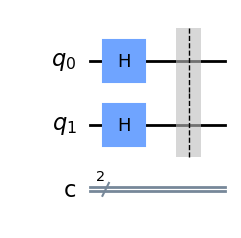

In [12]:
inputCircuit_2q = initCircuit(2)
inputCircuit_2q.draw(output='mpl')

## 5.2 Creating oracle for even

In [13]:
def createEvenOracle():
    circuit = QuantumCircuit(2, 2)
    
    circuit.x(0)
    circuit.x(1)
    circuit.cz(0, 1)
    circuit.x(1)
    circuit.cz(0, 1)
    circuit.x(0)
    circuit.barrier()
    
    return circuit

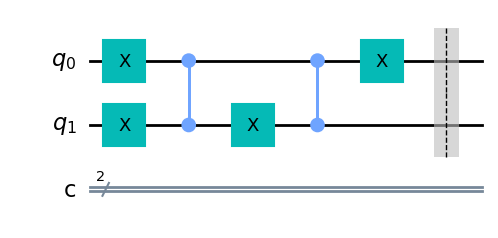

In [14]:
evenOracle = createEvenOracle()
evenOracle.draw(output='mpl')

### - test Oracle

In [15]:
Operator(evenOracle).data # find 0 and 2

array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

## 5.3 Diffuser

In [19]:
def createR_2q():
    circuit = QuantumCircuit(2, 2)
    
    circuit.z(0)
    circuit.z(1)
    circuit.cz(0, 1)
    
    return circuit

In [20]:
def createDiffuser_2q():
    circuit = QuantumCircuit(2, 2)
    
    circuit.h(0)
    circuit.h(1)
    circuit = circuit.compose(createR_2q())
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()
    
    return circuit

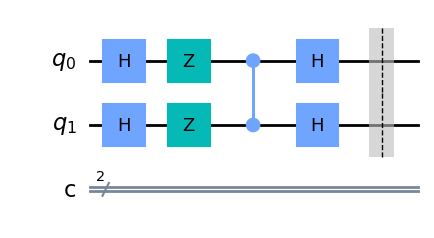

In [21]:
diffuserCircuit_2q = createDiffuser_2q()
diffuserCircuit_2q.draw(output='mpl')

## 5.4 Measurements

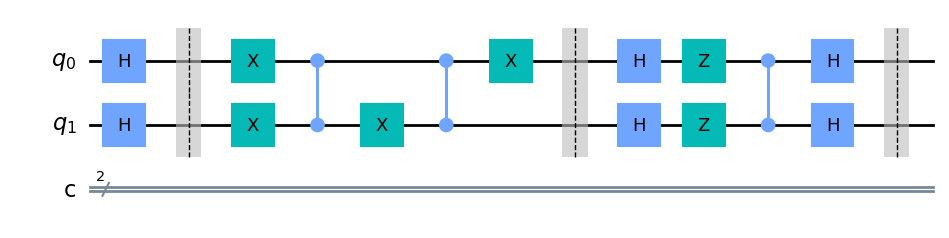

In [22]:
grover_even = initCircuit(2).compose(createEvenOracle()).compose(createDiffuser_2q())
grover_even.draw(output='mpl')

In [23]:
grover_even.measure([0, 1], [0, 1])

In [24]:
job = execute(grover_even, simulator, shots = 10000)
results = job.result()
counts = results.get_counts(grover_even)
print(counts)

{'10': 2544, '11': 2509, '01': 2441, '00': 2506}


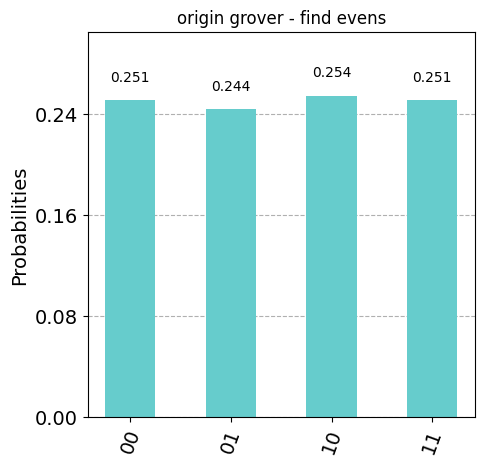

In [25]:
plot_histogram(counts, figsize=(5, 5), color="#66CCCC", title="origin grover - find evens")